<a href="https://colab.research.google.com/github/ShubhamJadhav03/DeepLearning/blob/main/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
!pip install tensorflow-cpu==2.13.0

In [7]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",
                   input_shape=IMAGE_SHAPE+(3,))
])

In [8]:
gold_fish = Image.open("/content/goldFish2.jpg").resize(IMAGE_SHAPE)

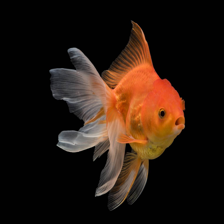

In [9]:
gold_fish

In [10]:
#scale image
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [11]:
gold_fish[np.newaxis, ...]

array([[[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        ...,

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]

In [12]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 1s 529ms/step


(1, 1001)

In [13]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [15]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [16]:
image_labels[predicted_label_index]

'goldfish'

Now, using Pre-trained Model for Flower Dataset

In [17]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 1s 0us/step


In [18]:
data_dir

'./datasets/flower_photos'

In [19]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [20]:
print(data_dir.exists())  # Should return True
print(data_dir.is_dir())  # Should return True


True
True


In [21]:
list(data_dir.glob('**/*.jpg')) [:5]

[PosixPath('datasets/flower_photos/daisy/5014137563_d03eb0ed75_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/2488902131_3417698611_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/11870378973_2ec1919f12.jpg'),
 PosixPath('datasets/flower_photos/daisy/12193032636_b50ae7db35_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/10555815624_dc211569b0.jpg')]

In [22]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/2788276815_8f730bd942.jpg'),
 PosixPath('datasets/flower_photos/roses/9300754115_dd79670066_n.jpg'),
 PosixPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5231103167_a03280e9f6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9164924345_6b63637acf.jpg')]

Read flowers images from disk into numpy array using opencv

In [23]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [24]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/2788276815_8f730bd942.jpg'),
 PosixPath('datasets/flower_photos/roses/9300754115_dd79670066_n.jpg'),
 PosixPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5231103167_a03280e9f6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9164924345_6b63637acf.jpg')]

In [25]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [26]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [27]:
X = np.array(X)
y = np.array(y)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [30]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [31]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [32]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

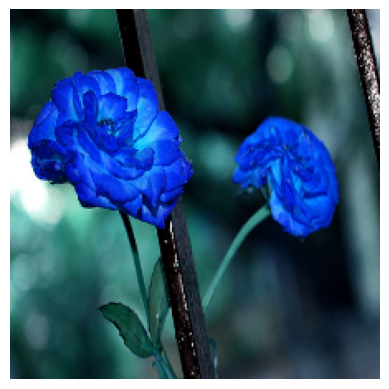

In [33]:
plt.axis('off')
plt.imshow(X[0])

In [34]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 707ms/step


array([722, 722, 116])

In [35]:
image_labels[845]

'switch'

Now take pre-trained model and retrain it using flowers images

In [36]:
#without that last layer
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [37]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [40]:
import os
os.environ["PYDEVD_DISABLE_FILE_VALIDATION"] = "1"

In [41]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


In [38]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train_scaled, y_train, epochs=5, batch_size=32)

Epoch 1/5
86/86 [==============================] - 122s 1s/step - loss: 0.6195 - accuracy: 0.7667
Epoch 2/5
86/86 [==============================] - 118s 1s/step - loss: 0.2903 - accuracy: 0.9015
Epoch 3/5
86/86 [==============================] - 115s 1s/step - loss: 0.2023 - accuracy: 0.9320
Epoch 4/5
86/86 [==============================] - 112s 1s/step - loss: 0.1575 - accuracy: 0.9549
Epoch 5/5
86/86 [==============================] - 112s 1s/step - loss: 0.1309 - accuracy: 0.9622


In [39]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 39s 1s/step - loss: 0.3712 - accuracy: 0.8780


[0.37115854024887085, 0.8779956698417664]